In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f= open('_chat.txt', 'r' , encoding= 'utf-8')
data = f.read()

In [3]:
print(data)

[11/08/23, 12:07:11 PM] VIT AP. (cse) Freshers place🥳🥳🥳🥳🥳: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[11/08/23, 12:07:11 PM] ~ TanK-human: ‎~ TanK-human created this group
[14/08/23, 6:48:04 PM] VIT AP. (cse) Freshers place🥳🥳🥳🥳🥳: ‎You joined from the community
[14/08/23, 6:48:04 PM] VIT AP. (cse) Freshers place🥳🥳🥳🥳🥳: ‎Anyone in the community “VIT AP” can request to join this group by messaging group admins.
[14/08/23, 6:49:03 PM] ~ Anish: ‎~ Anish joined using this group's invite link
[14/08/23, 6:49:05 PM] ~ Vikash: ‎~ Vikash joined from the community
[14/08/23, 6:50:14 PM] ~ Jithendra: Official i think so bro
[14/08/23, 6:50:31 PM] ~ Kaushik😁: Yaa bro
[14/08/23, 6:50:41 PM] ~ Anish: To fir dp looks unofficial
[14/08/23, 6:50:41 PM] ~ Kaushik😁: Seems to be official
[14/08/23, 6:50:54 PM] ~ Anish: Riyal*
[14/08/23, 6:51:34 PM] ~ Kushal: Even i got the same msg
[14/08/23, 6:52:53 PM] ~ Sumanth Reddy: ‎~ Suma

In [4]:
import re

def extract_datetime_and_user(chat_data):
    # Regex Pattern
    pattern = r'\[(\d{2}/\d{2}/\d{2}),\s(\d{1,2}:\d{2}:\d{2})\s?[APMapm]{2}\] ~\s?(.*?):'

    # Finding all matches
    matches = re.findall(pattern, chat_data)

    # Creating lists for DateTime and User
    dateTime = []
    user = []

    for match in matches:
        date, time, user_name = match
        dateTime.append(f"{date} {time}")  # Combine date and time
        user.append(user_name)

    return dateTime, user
dateTime_list , user_list = extract_datetime_and_user(data)




In [5]:
df = pd.DataFrame(list(zip(dateTime_list, user_list)), columns=['DateTime', 'User'])
df

,DateTime,User
0,11/08/23 12:07:11,TanK-human
1,14/08/23 6:49:03,Anish
2,14/08/23 6:49:05,Vikash
3,14/08/23 6:50:14,Jithendra
4,14/08/23 6:50:31,Kaushik😁
...,...,...
4485,07/02/25 11:57:57,Yoginder Sehrawanyia
4486,08/02/25 10:15:05,Dev Kaushik😎😎😎
4487,09/02/25 8:27:37,Yoginder Sehrawanyia
4488,09/02/25 7:44:58,Dev Kaushik😎😎😎


In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed')
df['Date'] = df['DateTime'].dt.date

In [7]:
#Getting the Time
df['Time'] = df['DateTime'].dt.time



In [8]:
df["Hour"] = df["DateTime"].dt.hour
df["Minute"] = df["DateTime"].dt.minute
df["Second"] = df["DateTime"].dt.second
#Droping the Redundant Column
df.drop(columns=["DateTime"], inplace=True)


In [9]:
df.drop(columns=["Time"], inplace=True)

In [10]:
df.head()

,User,Date,Hour,Minute,Second
0,TanK-human,2023-11-08,12,7,11
1,Anish,2023-08-14,6,49,3
2,Vikash,2023-08-14,6,49,5
3,Jithendra,2023-08-14,6,50,14
4,Kaushik😁,2023-08-14,6,50,31


In [11]:
def extract_chat_data(data):
    pattern =  r'\[\d{2}/\d{2}/\d{2},\s\d{1,2}:\d{2}:\d{2}\s?[APMapm]{2}\] ~\s?.*?:\s(.*)'
    message = re.findall(pattern, data)
    return message

In [12]:
message = [extract_chat_data(chat) for chat in data.split('\n') if extract_chat_data(chat)]

In [13]:
message

[['\u200e~\u202fTanK-human created this group'],
 ["\u200e~\u202fAnish joined using this group's invite link"],
 ['\u200e~\u202fVikash joined from the community'],
 ['Official i think so bro'],
 ['Yaa bro'],
 ['To fir dp looks unofficial'],
 ['Seems to be official'],
 ['Riyal*'],
 ['Even i got the same msg'],
 ['\u200e~\u202fSumanth Reddy joined from the community'],
 ['Dont know exactly after some days we know weather it offical or unofficial'],
 ['Guys better not to click the link'],
 ['Bas mujhe iska meaning nahi pta'],
 ['\u200eimage omitted'],
 ['I replied with Wheres the link'],
 ['I joined it broo'],
 ['Mujhe bhi'],
 ['\u200eThis message was deleted.'],
 ['Should I exit that'],
 ['Bro its unoffical'],
 ['Is this official'],
 ['\u200eimage omitted'],
 ["I mean, there are imposters , guys from companies not students are entering the group and may have our phone numbers it's risky"],
 ['\u200eimage omitted'],
 ['The creater'],
 ['As I said'],
 ['Haa ok'],
 ['God is only creator 😇😇'

In [14]:
# Adding this message to the Df 
df["Message"] = message
df.tail(5)

,User,Date,Hour,Minute,Second,Message
4485,Yoginder Sehrawanyia,2025-07-02,11,57,57,[https://www.instagram.com/reel/DFwqQRFy-3Q/?i...
4486,Dev Kaushik😎😎😎,2025-08-02,10,15,5,[‎image omitted]
4487,Yoginder Sehrawanyia,2025-09-02,8,27,37,[‎image omitted]
4488,Dev Kaushik😎😎😎,2025-09-02,7,44,58,[‎This message was deleted.]
4489,Dev Kaushik😎😎😎,2025-09-02,8,12,44,[‎image omitted]


In [15]:
df["Date"]=pd.to_datetime(df["Date"], errors='coerce')

In [16]:
# Replacing the Date with 3 columns Year, Month, Day
df['Year'] = df['Date'].dt.year
df["Month"]= df["Date"].dt.month
df["Day"]= df["Date"].dt.day

In [17]:
df.drop(columns=["Date"], inplace=True)

In [18]:
df.sample(4)

,User,Hour,Minute,Second,Message,Year,Month,Day
1886,Soham P,6,39,16,[the one that came in mail],2023,2,9
3974,Abhinav,11,18,29,[For aspiring developers at vit ap],2023,11,21
3588,TanK-human,6,27,27,[Feel free to post here],2023,6,10
307,TanK-human,4,52,41,[‎GIF omitted],2023,8,17


In [19]:
# Replacing the Month Number with Month Name
df['Month'] = df['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     4490 non-null   object
 1   Hour     4490 non-null   int32 
 2   Minute   4490 non-null   int32 
 3   Second   4490 non-null   int32 
 4   Message  4490 non-null   object
 5   Year     4490 non-null   int32 
 6   Month    4490 non-null   object
 7   Day      4490 non-null   int32 
dtypes: int32(5), object(3)
memory usage: 193.1+ KB


# Pre-Processing the Data


In [21]:
# Checking for null Values
df.isnull().sum()

User       0
Hour       0
Minute     0
Second     0
Message    0
Year       0
Month      0
Day        0
dtype: int64

There are no null Values in the Dataset


In [22]:
# Getting the Info on the Dataset
df.describe()

,Hour,Minute,Second,Year,Day
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,6.678842,28.574165,29.285078,2023.094878,15.230512
std,3.356480,17.684078,17.249258,0.307181,6.785062
min,1.000000,0.000000,0.000000,2023.000000,1.000000
25%,4.000000,13.000000,15.000000,2023.000000,9.000000
50%,8.000000,27.000000,29.000000,2023.000000,15.000000
75%,9.000000,45.000000,44.000000,2023.000000,19.000000
max,12.000000,59.000000,59.000000,2025.000000,31.000000


In [23]:
# Checking the Unique Users in the Chat
df["User"].value_counts()

User
TanK-human     694
Shiven         319
Anish          230
Jithendra      225
K.Parthiv      183
              ... 
Avishkar         1
Mohanish😊        1
Naga Charan      1
Kowshik          1
Goel_chatty      1
Name: count, Length: 351, dtype: int64

# Making the Features

1. The Trends of Activness of chats 

In [24]:
df.sample(1)

,User,Hour,Minute,Second,Message,Year,Month,Day
3432,TanK-human,6,21,31,[‎image omitted],2023,September,26


In [25]:
import pandas as pd
import plotly.express as px
import plotly.express as px

def plot_activity_trend(df, frequency='M'):
    """Plots the Activity of people in the Group Chat. 
    Users can view trends monthly or weekly interactively."""

    # Create a copy of the original dataframe
    df_engrouped = df.copy()

    # Mapping month names to numbers if needed
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df_engrouped["Month"] = df_engrouped["Month"].map(month_mapping).fillna(df_engrouped["Month"]).astype(int)

    # Creating DateTime column
    df_engrouped["DateTime"] = pd.to_datetime(df_engrouped[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])

    # Grouping by the chosen frequency
    if frequency == "M":
        trend_data = df_engrouped.groupby(df_engrouped["DateTime"].dt.to_period("M")).size().reset_index(name="Message_Count")
        trend_data["DateTime"] = trend_data["DateTime"].astype(str)  # Convert Period to string
        title = "Monthly User Activity Trend"
    elif frequency == "W":
        trend_data = df_engrouped.groupby(df_engrouped["DateTime"].dt.to_period("W")).size().reset_index(name="Message_Count")
        trend_data["DateTime"] = trend_data["DateTime"].astype(str)  # Convert Period to string
        title = "Weekly User Activity Trend"
    else:
        print("Unsupported Frequency. Please use 'M' for Monthly or 'W' for Weekly.")
        return

    # Plotting the activity trend
    fig = px.line(
        trend_data, x='DateTime', y='Message_Count', title=title, markers=True,
        labels={'DateTime': 'Date', 'Message_Count': 'No. of Messages'},
        template='plotly_white'
    )
    fig.update_traces(line=dict(color="blue", width=2), marker=dict(size=8))
    fig.update_layout(xaxis_title="Date", yaxis_title="No. of Messages")
    fig.show()





In [26]:
plot_activity_trend(df , frequency = 'M')

This Feature will Show the Activness of the Group Both Month wise and week wise


In [27]:
# Next Feature is to get the Bar Graph of the User Activity -> user wise both Monthly and Weekly 
# This will Display the top 10 users who are most active in the Group Chat
import pandas as pd
import plotly.express as px
def most_active_user(df, frequency = "M"):
    df_grouped = df.copy()
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df_grouped["Month"] = df_grouped["Month"].map(month_mapping).fillna(df_grouped["Month"]).astype(int)
    # Creating the DateTime Column
    df_grouped["DateTime"] = pd.to_datetime((df_grouped[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]))

    # Grouping the Data 
    if frequency=="M":
        user_activity = df_grouped.groupby(["User",df_grouped["DateTime"].dt.to_period("M")]).size().reset_index(name="Message_Count")
        user_activity["DateTime"] = user_activity["DateTime"].astype(str)
        top_users = (user_activity.groupby("User")["Message_Count"].sum().sort_values(ascending=False).head(10).reset_index())
        title = "Monthy Activity User Wise"
    elif frequency=="W":
        user_activity = (df_grouped.groupby(["User",df_grouped["DateTime"].dt.to_period("W")]).size().reset_index(name="Message_Count"))
        user_activity["DateTime"] = user_activity["DateTime"].astype(str)
        top_users = user_activity.groupby("User")["Message_Count"].sum().sort_values(ascending=False).head(10).reset_index()
        title = "Weekly Activity User Wise"
    else:
        print("Unsupported Frequency. Please use 'M' for Monthly or 'W' for Weekly.")
    
    #Ploting the Graph 
   # Plotting the Bar Graph
    fig = px.bar(
        top_users,
        x="User",
        y="Message_Count",
        title=title,
        template="plotly_white",
        labels={"User": "Top 10 Users", "Message_Count": "No. of Messages"},
        color="User"  # Adds different colors for each user
    )

    fig.update_layout(xaxis_title="User", yaxis_title="No. of Messages")
    fig.show()

# Data Preparation

    
                 


In [28]:
most_active_user(df , frequency = 'W')

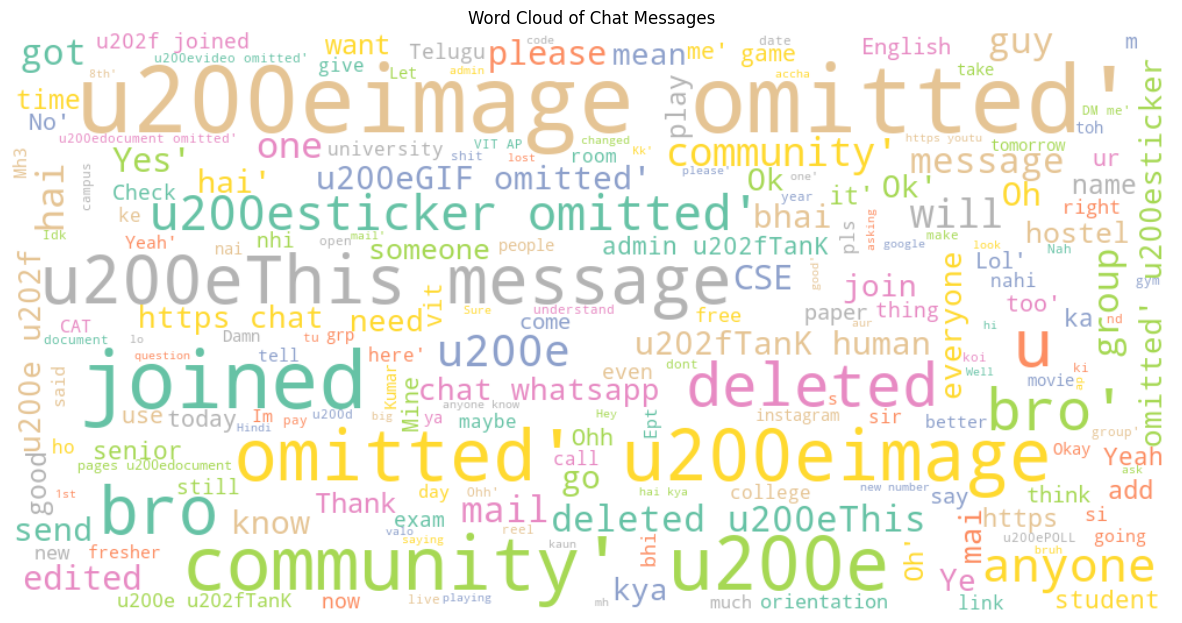

In [29]:
from wordcloud import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all messages into one large text
all_text = " ".join(df["Message"].dropna().astype(str))  # Make sure 'Message' is the correct column name

# Generate the Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="Set2",
    max_words=200,
    contour_color='black',
    contour_width=3,
).generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Chat Messages")
plt.show()


In [30]:
df.sample(5)

,User,Hour,Minute,Second,Message,Year,Month,Day
59,Udveet P. Patil,8,10,34,[This same guy],2023,August,14
3425,TanK-human,6,21,2,[‎image omitted],2023,September,26
3385,TanK-human,11,28,56,[I don't know if the QR is a hack],2023,September,24
4417,shrishanthv,4,32,44,[Is anyone going to vijayawada tmrw morning 7 ...,2024,October,26
3875,Anish,7,53,32,[Lmao],2023,October,17


In [31]:
df_message = df['Message'].dropna().astype(str)
df_message

0          ['\u200e~\u202fTanK-human created this group']
1       ["\u200e~\u202fAnish joined using this group's...
2       ['\u200e~\u202fVikash joined from the community']
3                             ['Official i think so bro']
4                                             ['Yaa bro']
                              ...                        
4485    ['https://www.instagram.com/reel/DFwqQRFy-3Q/?...
4486                              ['\u200eimage omitted']
4487                              ['\u200eimage omitted']
4488                  ['\u200eThis message was deleted.']
4489                              ['\u200eimage omitted']
Name: Message, Length: 4490, dtype: object

In [32]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")



PyTorch Version: 2.6.0+cu118
CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4050 Laptop GPU


In [33]:

print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should show "NVIDIA GeForce RTX 4050"


True
NVIDIA GeForce RTX 4050 Laptop GPU


In [36]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.device_count())  # Should be > 0 if GPU is detected
print(torch.cuda.get_device_name(0))  # Check which GPU is being used


True
1
NVIDIA GeForce RTX 4050 Laptop GPU


In [38]:
import torch

# Set the device manually
torch.cuda.set_device(0)  # Ensure you are using GPU 0

print("CUDA Device in use:", torch.cuda.current_device())  # Should print 0
print("GPU Name:", torch.cuda.get_device_name(0))


CUDA Device in use: 0
GPU Name: NVIDIA GeForce RTX 4050 Laptop GPU


In [44]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()


RuntimeError: CUDA error: an illegal memory access was encountered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [45]:
from transformers import pipeline

# Load sentiment analysis model on GPU
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    device=0  # Ensure it runs on GPU
)

# Example: List of multiple messages (Replace with your 4700 rows)
messages = df_message['message']  # Simulated batch

# Process messages in BATCHES
batch_size = 32  # Adjust based on your GPU memory
results = [sentiment_pipeline(messages[i:i+batch_size]) for i in range(0, len(messages), batch_size)]

print(results)



Device set to use cuda:0


RuntimeError: CUDA error: an illegal memory access was encountered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [40]:
print("Torch device in use:", torch.cuda.current_device())  # Should print 0
print("Torch device name:", torch.cuda.get_device_name(0))  # Should show the GPU name

Torch device in use: 0
Torch device name: NVIDIA GeForce RTX 4050 Laptop GPU


In [41]:
df_message

0          ['\u200e~\u202fTanK-human created this group']
1       ["\u200e~\u202fAnish joined using this group's...
2       ['\u200e~\u202fVikash joined from the community']
3                             ['Official i think so bro']
4                                             ['Yaa bro']
                              ...                        
4485    ['https://www.instagram.com/reel/DFwqQRFy-3Q/?...
4486                              ['\u200eimage omitted']
4487                              ['\u200eimage omitted']
4488                  ['\u200eThis message was deleted.']
4489                              ['\u200eimage omitted']
Name: Message, Length: 4490, dtype: object